# Patterns that Determine Success of a Computer Game

We have an open database of a video game internet store. From this db we could gather such info as selling history, user and expert rates, genres and platforms (like xbox or ps). We need to find the patterns, that determine success of the product.
This will allow to plan advertising company with potentially popular and valuable products.


We have data for 3 major markets - North American, European and Japanese, with information about sold million copies , user rating, ESRB rating and critics, and game genre. 

Entertainment Software Rating Board (ESRB) — is a self-regulatory organization that assigns age and content ratings to consumer video games in the United States and Canada. 


-Rating Pending (RP)

-Everyone (E)

-Everyone 10+ (E10+)

-Teen (T)

-Mature 17+ (M)

-Adults Only 18+ (AO)

-Early Childhood (EC)

We have csv-file.
To begin with, we are study the data, conduct preprocessing, and process gaps and duplicates.

## Research and data preparation

Data Description:
Name — Game name
Platform — Platform name
Year_of_Release — year of release
Genre — game genre

NA_sales — sales in the Nothern America (sold millions of copies)

EU_sales — sales in the European Union (sold millions of copies)

JP_sales — sales in Japan (sold millions of copies)

Other_sales — sales in other countries (sold millions of copies)

Critic_Score — critic score (maximum 100)

User_Score — user score (maximum 10)

Rating — rating by ESRB (Entertainment Software Rating Board).

Data for 2016 may not be complete.

In [54]:
import pandas as pd
from IPython.display import display
import numpy as np
import math
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns


In [55]:
def to_variance (data, column):
    col_data = data[column]
    variance = np.var(col_data)
    std_dev = np.sqrt(variance)
    max_value = col_data.mean() + 3 * std_dev  #(μ + 3σ)
    
    print('Variance (дисперсия): ', variance)
    print('Standard deviation: ', std_dev) 
    print('Maximum value (limit outlier):', max_value)

In [56]:
data=pd.read_csv('/datasets/games.csv')

In [57]:
data.columns = map(str.lower, data.columns)

In [58]:
data.tail(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16705,15 Days,PC,2009.0,Adventure,0.00,0.01,0.00,0.0,63.0,5.8,NaN
16706,Men in Black II: Alien Escape,GC,2003.0,Shooter,0.01,0.00,0.00,0.0,NaN,tbd,T
16707,Aiyoku no Eustia,PSV,2014.0,Misc,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.00,0.00,0.00,0.0,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [60]:
data[data['genre'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [61]:
data = data.dropna(subset=['name', 'year_of_release','genre'])

In [62]:
print(data.isna().sum())

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64


In [63]:
data[data['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [64]:
data[data['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [65]:
data[data['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [66]:
print(data.duplicated().sum)

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
16710    False
16711    False
16712    False
16713    False
16714    False
Length: 16444, dtype: bool>


In [67]:
data_tbd_user_score = data[(data['user_score'] == 'tbd')]
data_tbd_user_score.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.00,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.00,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.00,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.00,0.18,NaN,tbd,E
726,Dance Dance Revolution X2,PS2,2009.0,Simulation,1.09,0.85,0.00,0.28,NaN,tbd,E10+
821,The Incredibles,GBA,2004.0,Action,1.15,0.77,0.04,0.10,55.0,tbd,E
881,Who wants to be a millionaire,PC,1999.0,Misc,1.94,0.00,0.00,0.00,NaN,tbd,E
1047,Tetris Worlds,GBA,2001.0,Puzzle,1.25,0.39,0.00,0.06,65.0,tbd,E
1048,Imagine: Teacher,DS,2008.0,Simulation,0.70,0.82,0.00,0.19,NaN,tbd,E


In [68]:
data_tbd_user_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2376 entries, 119 to 16706
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2376 non-null   object 
 1   platform         2376 non-null   object 
 2   year_of_release  2376 non-null   float64
 3   genre            2376 non-null   object 
 4   na_sales         2376 non-null   float64
 5   eu_sales         2376 non-null   float64
 6   jp_sales         2376 non-null   float64
 7   other_sales      2376 non-null   float64
 8   critic_score     1056 non-null   float64
 9   user_score       2376 non-null   object 
 10  rating           2326 non-null   object 
dtypes: float64(6), object(5)
memory usage: 222.8+ KB


Рейтинг ESRB пропуски заменили на категорию RP - так как это равнозначно.
We 

In [69]:
def to_type(data_to_write, column, target_type):
    data_to_write[column] = data_to_write[column].astype(target_type)
    
to_type(data,'year_of_release','uint16')

data['critic_score'] = data['critic_score'].fillna(-1)

data['user_score'] = data['user_score'].replace('tbd', '-2')
data['user_score'] = data['user_score'].fillna('-1')
to_type(data,'user_score','float')

data['rating'] = data['rating'].fillna('RP')
print(data.isna().sum())
#data['year_of_release'] = pd.to_datetime(data['year_of_release'], format='%Y)

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64


We are going to calculate Nan count in user_score

In [70]:
data_year_user_nan = data.query('user_score == -1').groupby('year_of_release')['user_score'].count().reset_index()
data_year_user_nan.head()

,year_of_release,user_score
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14


In [71]:
data_year_user_score = data.groupby('year_of_release')['user_score'].count().reset_index()
data_year_user_score.head()

,year_of_release,user_score
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14


Let's look at the distribution of gaps in user_score

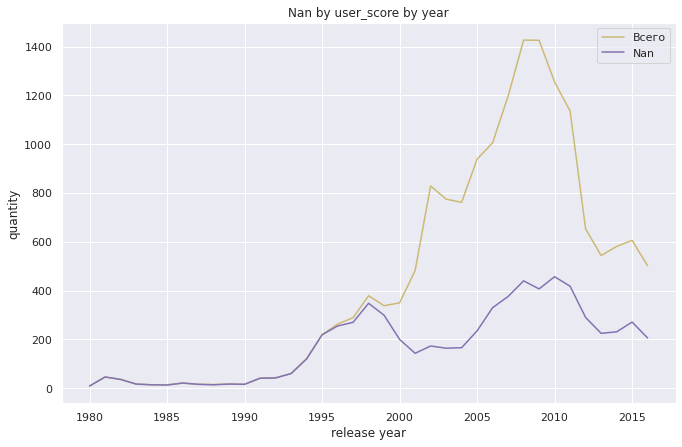

In [546]:
plt.figure(figsize = (11, 7))

plt.plot(data_year_user_score['year_of_release'], data_year_user_score['user_score'], alpha = 1, label = 'Всего', color = 'y')
plt.plot(data_year_user_nan['year_of_release'], data_year_user_nan['user_score'], alpha = 1, label = 'Nan', color = 'm')

plt.legend()
plt.title('Nan by user_score by year')
plt.xlabel('release year')
plt.ylabel('quantity')
plt.show()

In [73]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [74]:
data.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000
mean,2006.486256,0.264012,0.145930,0.078487,0.047594,32.979871,2.543590
std,5.875525,0.818378,0.506716,0.311100,0.188005,36.302947,4.310384
min,1980.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-2.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,-1.000000,-1.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,70.000000,7.300000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


## Exploratory data analysis

number of games by year

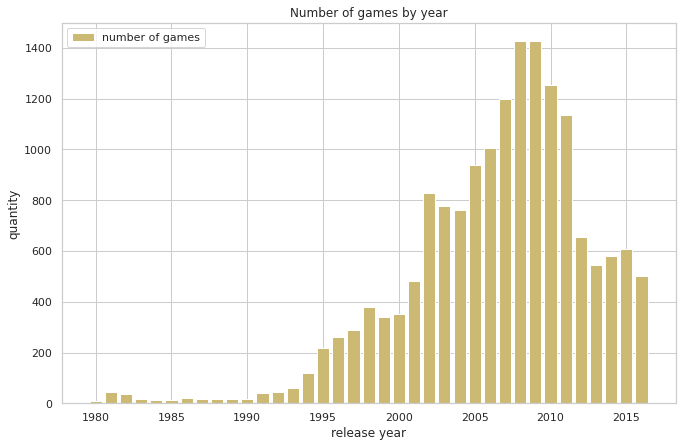

In [75]:
plt.figure(figsize = (11, 7))

plt.bar(data_year_user_score['year_of_release'], data_year_user_score['user_score'], alpha = 1, label = 'number of games', color = 'y')

plt.legend()
plt.title('Number of games by year')
plt.xlabel('release year')
plt.ylabel('quantity')
plt.show()

The largest number of games were released in 2007-2010. A sharp increase of the amount of release gameshas been observed since 2002. 
Since 2012, the amount of release games has been decreased. Perhaps there has been a transition from the quantity to the quality of released games on these platforms. 

In [76]:
data['total_sales']=data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']

In [77]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,RP,31.38


In [78]:
data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index().head(8)

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58
6,PS4,314.14
7,GBA,312.88


In [79]:
plt.figure(figsize = (11, 7))

data_platform_pt = pd.pivot_table(data, index = ["platform"]).reset_index()
data_platform_pt.head()


,platform,critic_score,eu_sales,jp_sales,na_sales,other_sales,total_sales,user_score,year_of_release
0,2600,-1.000000,0.041897,0.000000,0.696379,0.007241,0.745517,-1.000000,1982.137931
1,3DO,-1.000000,0.000000,0.033333,0.000000,0.000000,0.033333,-1.000000,1994.666667
2,3DS,21.097656,0.119668,0.196523,0.161426,0.025918,0.503535,1.516992,2013.126953
3,DC,22.788462,0.032500,0.164615,0.104423,0.005192,0.306731,1.565385,1999.942308
4,DS,20.606789,0.088831,0.082518,0.179307,0.027836,0.378491,0.585856,2008.185290


<Figure size 792x504 with 0 Axes>

<AxesSubplot:xlabel='year_of_release', ylabel='total_sales'>

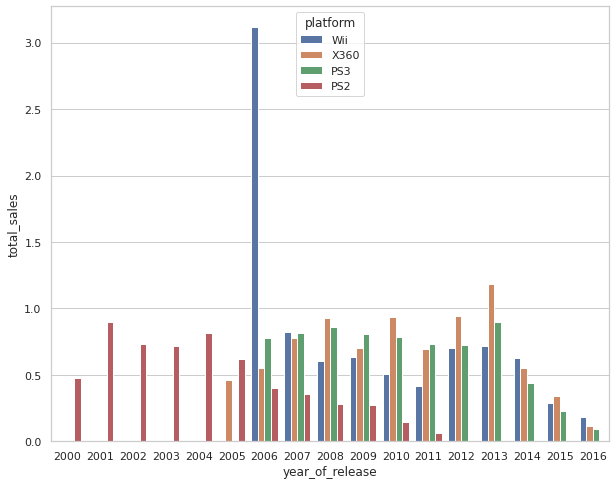

In [80]:
sns.set(rc={'figure.figsize':(10,8)})
top_4_platforms = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(4)
data_top_4_platforms =data.query('platform in @top_4_platforms.index')
sns.set_style("whitegrid")
sns.barplot(data=data_top_4_platforms, x="year_of_release", y="total_sales", hue='platform', ci=None)

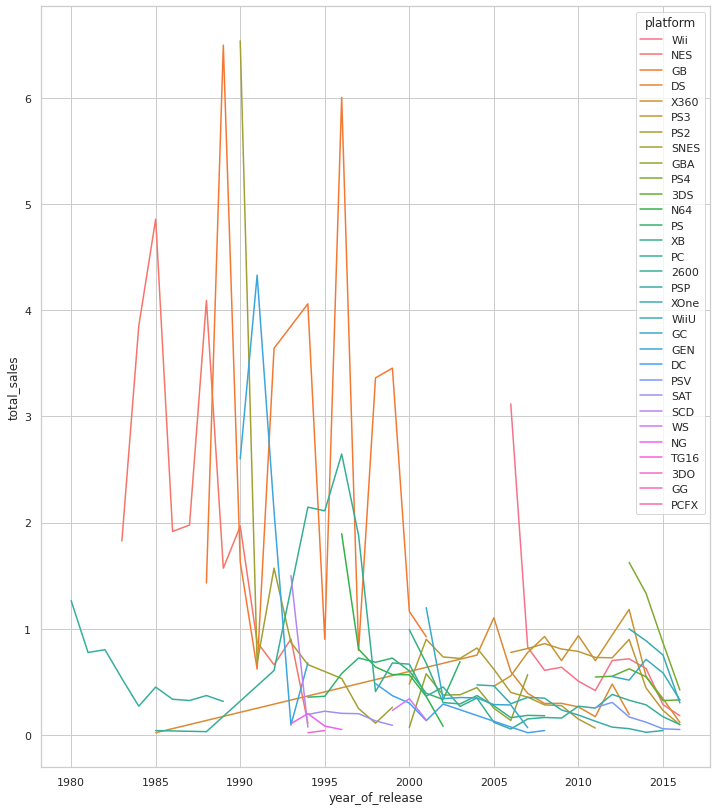

In [81]:
sns.set(rc={'figure.figsize':(12,14)})
sns.set_style("whitegrid")
s1=sns.lineplot(data=data, x="year_of_release", y="total_sales", hue='platform', ci=None)

10 years - the average lifecycle of the platforms

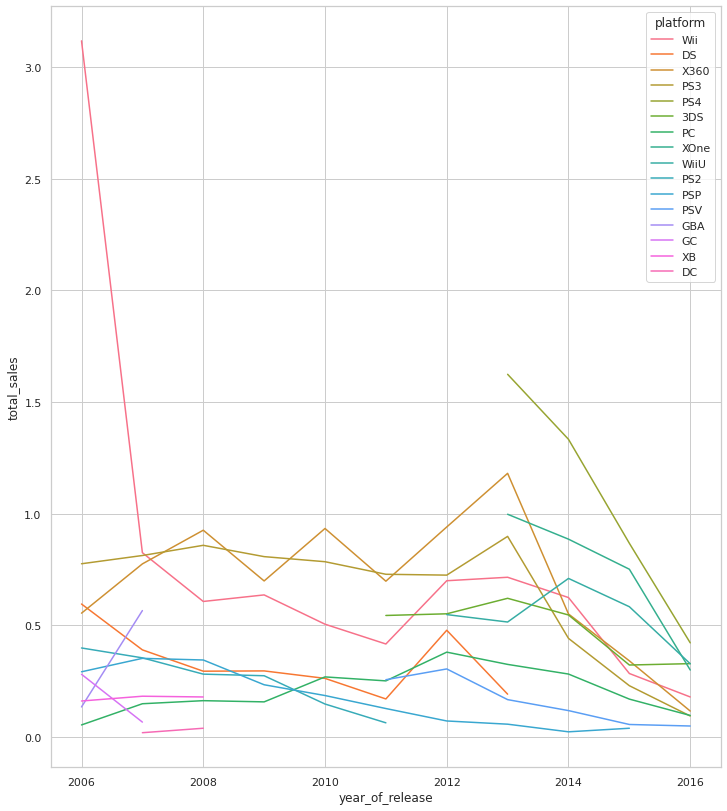

In [82]:
sns.set(rc={'figure.figsize':(12,14)})
platforms_10 = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10)
platforms_10 = data.query('year_of_release <= 2016 and year_of_release >= 2006' )
sns.set_style("whitegrid")
ss=sns.lineplot(data=platforms_10, x="year_of_release", y="total_sales", hue='platform', ci=None)

We can see that since 2013, 2 new platforms have appeared at once. We are going to take the period 2013-2016 for further analysis. But we will keep in mind  that the data for 2016 may not be complete.

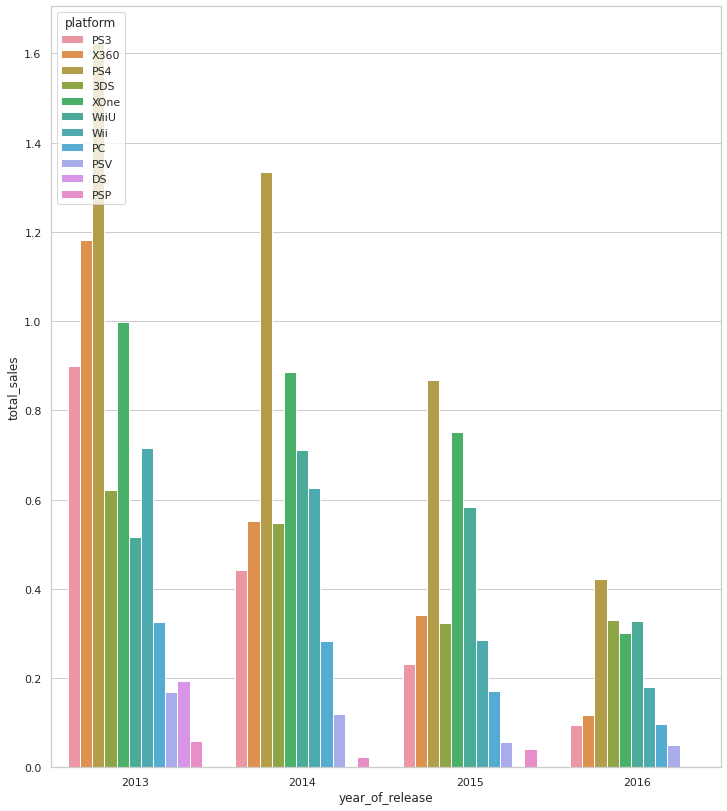

In [83]:
sns.set(rc={'figure.figsize':(12,14)})
platforms_3 = platforms_10.query('year_of_release <= 2016 and year_of_release >= 2013' )
sns.set_style("whitegrid")
r1=sns.barplot(data=platforms_3, x="year_of_release", y="total_sales", hue='platform', ci=None)

In [84]:
platforms_3.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index().head(8)

,platform,total_sales
0,PS4,314.14
1,PS3,181.43
2,XOne,159.32
3,3DS,143.25
4,X360,136.80
5,WiiU,64.63
6,PC,39.43
7,PSV,32.99


The most profitable platforms are PS4, PS3, XOne, 3DS, X360. 

We are going to plot a "Box and Whisker Plot" graph of total game sales by platform.

In [85]:
limit=platforms_3['total_sales'].quantile(0.75)+platforms_3['total_sales'].quantile(0.25)

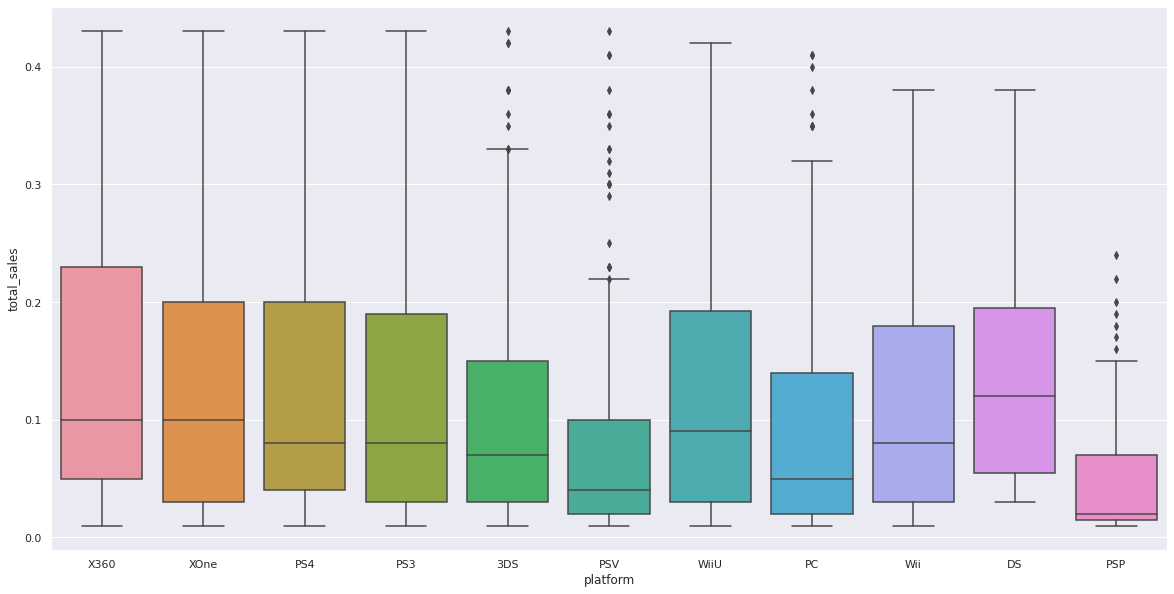

In [86]:
sns.set(rc={'figure.figsize':(20,10)})
l=sns.boxplot(x='platform',y='total_sales',data=platforms_3.query('total_sales <= @limit'))

In [87]:
platforms_3.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000
mean,2014.477385,0.196019,0.175652,0.063045,0.053726,31.407524,3.000358,0.488442
std,1.089439,0.547730,0.512451,0.233997,0.165693,37.282494,4.017931,1.235226
min,2013.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-2.000000,0.010000
25%,2014.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.030000
50%,2014.000000,0.020000,0.030000,0.010000,0.010000,-1.000000,3.500000,0.110000
75%,2015.000000,0.150000,0.130000,0.050000,0.040000,72.000000,7.100000,0.400000
max,2016.000000,9.660000,9.090000,4.350000,3.960000,97.000000,9.300000,21.050000


<Figure size 576x720 with 0 Axes>

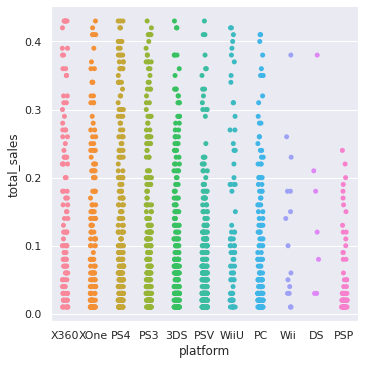

In [88]:
plt.figure(figsize=(8,10))
mс=sns.catplot(x='platform', y='total_sales', data=platforms_3.query('total_sales <= @limit'))

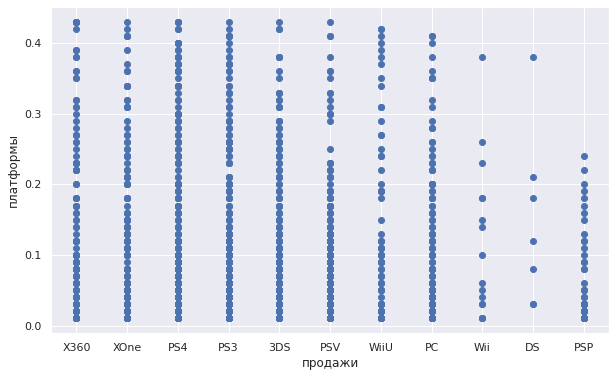

In [89]:
platforms_3_lim=platforms_3.query('total_sales <= @limit')
fig, ax = plt.subplots(figsize=(10, 6))
p=ax.scatter(x = platforms_3_lim['platform'], y = platforms_3_lim['total_sales'])
plt.xlabel("продажи")
plt.ylabel("платформы")

plt.show()

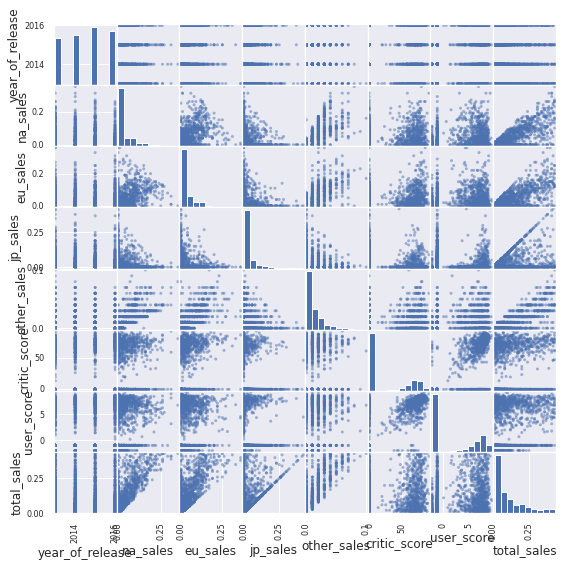

In [90]:
cr=pd.plotting.scatter_matrix(platforms_3_lim, figsize=(9, 9))

In [91]:
print(platforms_10.corr())

                 year_of_release  na_sales  eu_sales  jp_sales  other_sales  \
year_of_release         1.000000 -0.035243  0.026185  0.007908    -0.015818   
na_sales               -0.035243  1.000000  0.862691  0.428297     0.825551   
eu_sales                0.026185  0.862691  1.000000  0.447965     0.877540   
jp_sales                0.007908  0.428297  0.447965  1.000000     0.391508   
other_sales            -0.015818  0.825551  0.877540  0.391508     1.000000   
critic_score           -0.060282  0.228401  0.210648  0.031851     0.226329   
user_score              0.001132  0.198593  0.180724  0.039250     0.203512   
total_sales            -0.008726  0.959266  0.949298  0.570715     0.893480   

                 critic_score  user_score  total_sales  
year_of_release     -0.060282    0.001132    -0.008726  
na_sales             0.228401    0.198593     0.959266  
eu_sales             0.210648    0.180724     0.949298  
jp_sales             0.031851    0.039250     0.570715  
oth

In [92]:
platform_ps4 = platforms_3.query('platform == "PS4"')
platform_ps4.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1.0,-1.0,RP,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,-1.0,-1.0,RP,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60
105,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,7.17
143,FIFA 15,PS4,2014,Sports,0.80,4.33,0.05,0.90,82.0,5.7,E,6.08
154,Destiny,PS4,2014,Shooter,2.49,2.07,0.16,0.92,76.0,6.1,T,5.64
171,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T,5.39


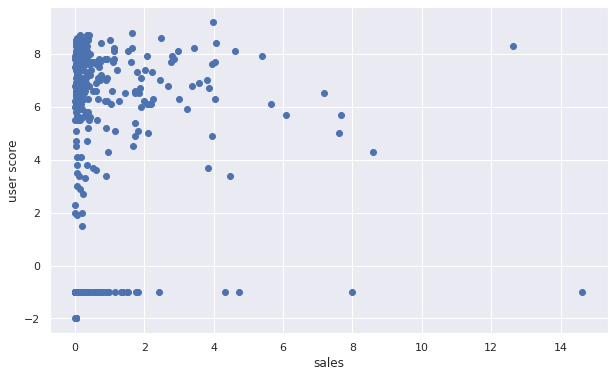

In [93]:
fig, ax = plt.subplots(figsize=(10, 6))
sc=ax.scatter(x = platform_ps4['total_sales'], y = platform_ps4['user_score'])
plt.xlabel("sales")
plt.ylabel("user score")

plt.show()

In [94]:
platform_ps4.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.248961,-0.208306,-0.060993,-0.234796,-0.126772,-0.071644,-0.235032
na_sales,-0.248961,1.000000,0.785362,0.472981,0.944259,0.216386,0.113385,0.928160
eu_sales,-0.208306,0.785362,1.000000,0.464563,0.944698,0.221035,0.116109,0.958157
jp_sales,-0.060993,0.472981,0.464563,1.000000,0.496467,0.010295,-0.031289,0.527129
other_sales,-0.234796,0.944259,0.944698,0.496467,1.000000,0.228936,0.119596,0.998051
critic_score,-0.126772,0.216386,0.221035,0.010295,0.228936,1.000000,0.904835,0.226526
user_score,-0.071644,0.113385,0.116109,-0.031289,0.119596,0.904835,1.000000,0.117211
total_sales,-0.235032,0.928160,0.958157,0.527129,0.998051,0.226526,0.117211,1.000000


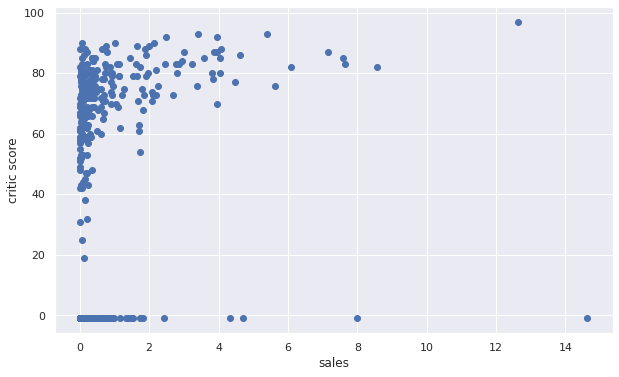

In [95]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = platform_ps4['total_sales'], y = platform_ps4['critic_score'])
plt.xlabel("sales")
plt.ylabel("critic score")

plt.show()

In [96]:
platforms_3_by_genre = platforms_3.groupby('genre')['total_sales'].count().sort_values(ascending=False).reset_index()
platforms_3_by_genre.head(100)

,genre,total_sales
0,Action,766
1,Role-Playing,292
2,Adventure,245
3,Sports,214
4,Shooter,187
5,Misc,155
6,Racing,85
7,Fighting,80
8,Platform,74
9,Simulation,62


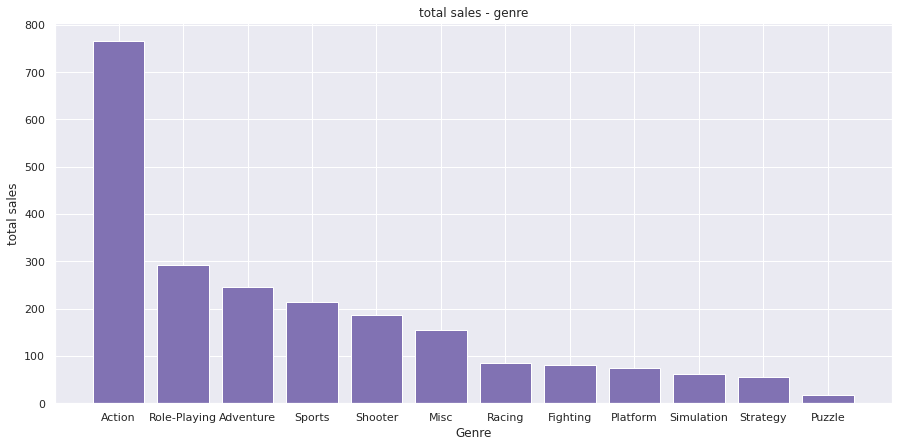

In [97]:
plt.figure(figsize = (15, 7))

plt.bar(platforms_3_by_genre['genre'], platforms_3_by_genre['total_sales'], alpha = 1, color = 'm')

plt.title('total sales - genre')
plt.xlabel('Genre')
plt.ylabel('total sales')
plt.show()

We can see total distribution of games by genre. 
The highest sales can be identified in the Action, Role-Playing, Adventure genres. The Puzzle game has the smallest number of sales - 17 million copies. Less than 100 million copies of the genres - Racing, Fighting, Platform, Simulation, Strategy. However, a game can have multiple genres. For example GTA5 may have several genres of Shooter, Action, Racing.

## User portrait for each region

We are going to define for the user of each region (NA, EU, JP): The most popular platforms (top 5), The most popular genres (top 5).

In [98]:
platforms_3['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'DS', 'PSP'], dtype=object)

In [99]:
platforms_3_ps4 = platforms_3.query('platform == "PS4"')
platforms_3_ps4.groupby('platform')['na_sales'].count().sort_values(ascending=False)

platform
PS4    392
Name: na_sales, dtype: int64

In [535]:
def print_nlargest(data_frame_tp, color_hash_offset = ''):
    c = ['#{:03x}'.format(int(hash(s + s[::-1] + color_hash_offset + color_hash_offset[::-1]) % 256)) for s in data_frame_tp.index.values]
    data_frame_tp.plot(kind = 'bar', color = c)
    plt.xticks(fontsize = 20, rotation = 0)
    plt.yticks(fontsize = 20, rotation = 0)
    plt.ylabel('Million of copies', fontsize = 20)
    plt.xlabel('')
    plt.show()

In [536]:
#top 5 platforms in EU
top_5_platforms_eu = platforms_3.groupby(['platform'])['eu_sales'].sum().nlargest(5)
top_5_platforms_eu

platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
Name: eu_sales, dtype: float64

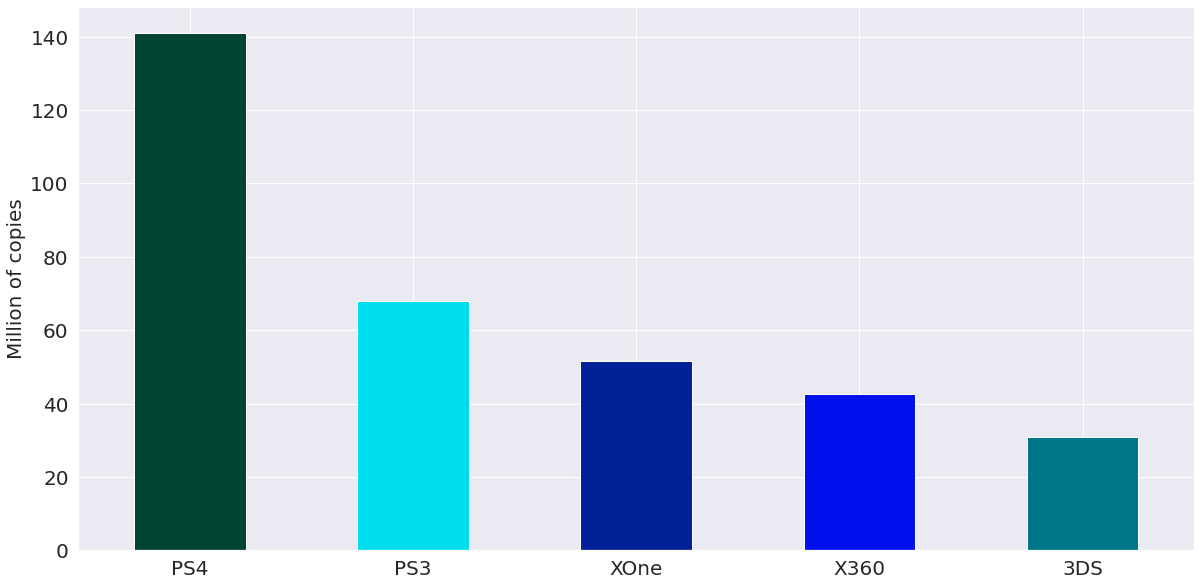

In [537]:
print_nlargest(top_5_platforms_eu)

In [538]:
#top 5 genre in EU
top_5_genre_eu = platforms_3.groupby(['genre'])['eu_sales'].sum().nlargest(5)

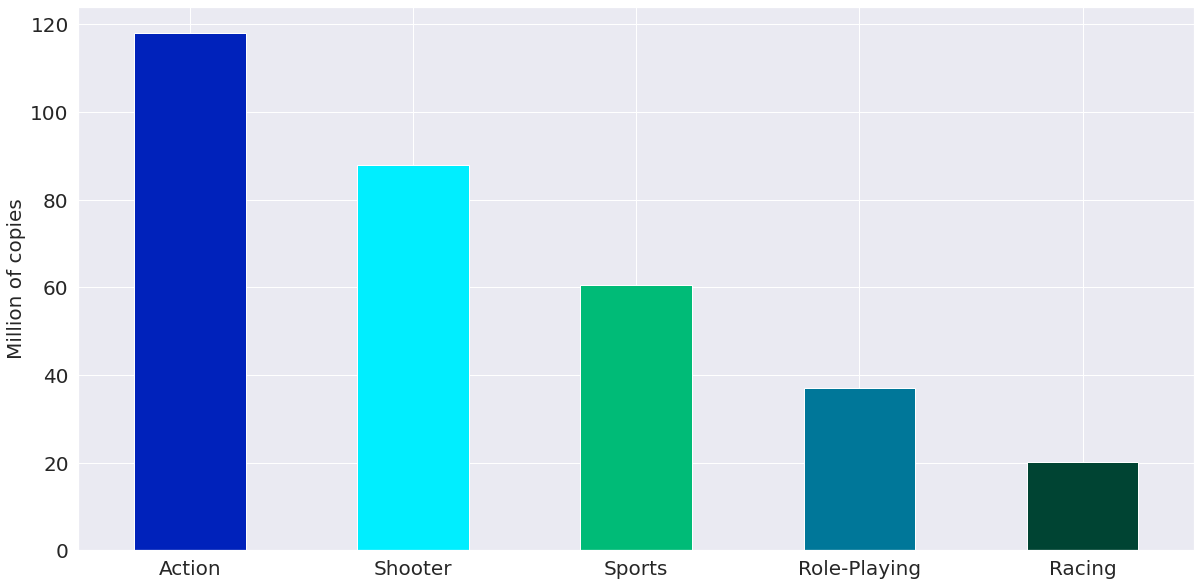

In [541]:
print_nlargest(top_5_genre_eu, "10")

In [540]:
# Rating Pending (RP)
# Everyone (E)
# Everyone 10+ (E10+)
# Teen (T)
# Mature 17+ (M)
# Adults Only 18+ (AO)
# Early Childhood (EC)
platforms_3.groupby(['rating'])['eu_sales'].sum().nlargest(10)

rating
M       145.32
E        83.36
RP       78.91
E10+     42.69
T        41.95
Name: eu_sales, dtype: float64

In [441]:
#top 5 platforms in NA
top_5_platforms_na = platforms_3.groupby(['platform'])['na_sales'].sum().nlargest(5)

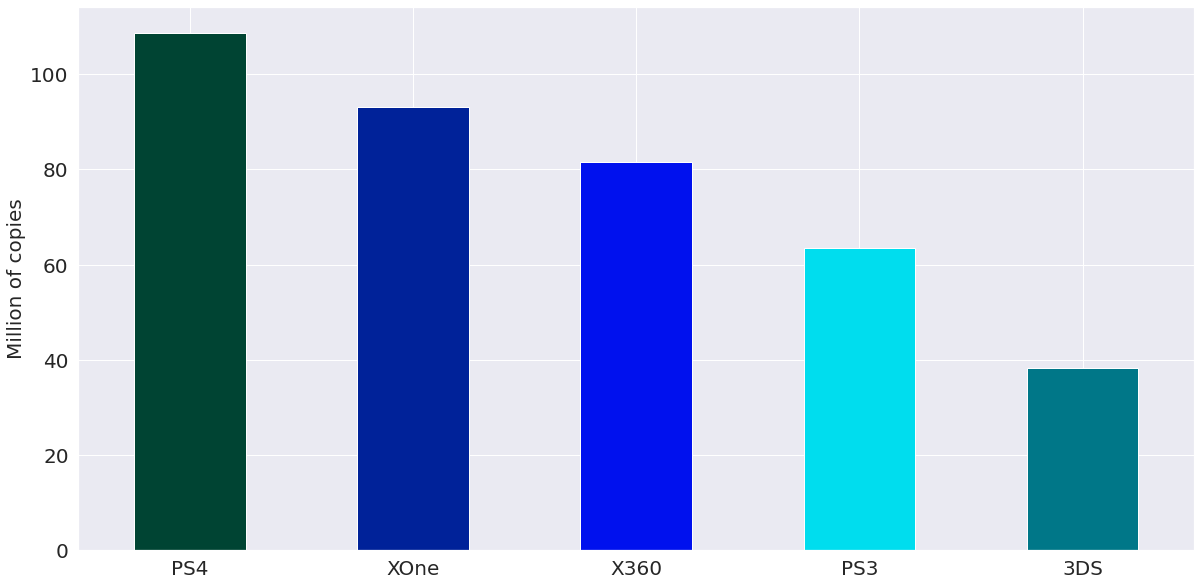

In [442]:
print_nlargest(top_5_platforms_na)

In [443]:
#top 5 genre in NA
top_5_genre_na = platforms_3.groupby(['genre'])['na_sales'].sum().nlargest(5)

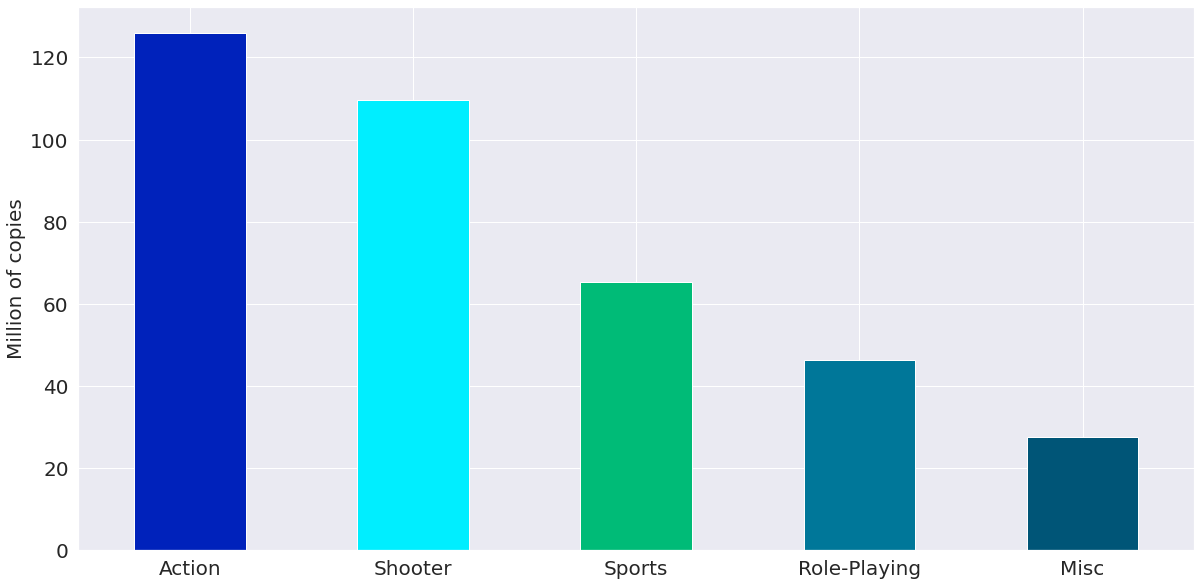

In [542]:
print_nlargest(top_5_genre_na, "10")

In [445]:
# Rating Pending (RP)
# Everyone (E)
# Everyone 10+ (E10+)
# Teen (T)
# Mature 17+ (M)
# Adults Only 18+ (AO)
# Early Childhood (EC)

#raiting in NA
platforms_3.groupby(['rating'])['na_sales'].sum().nlargest(10)

rating
M       165.21
RP       89.42
E        79.05
E10+     54.24
T        49.79
Name: na_sales, dtype: float64

In [446]:
#top 5 platforms in JP
top_5_platforms_jp = platforms_3.groupby(['platform'])['jp_sales'].sum().nlargest(5)

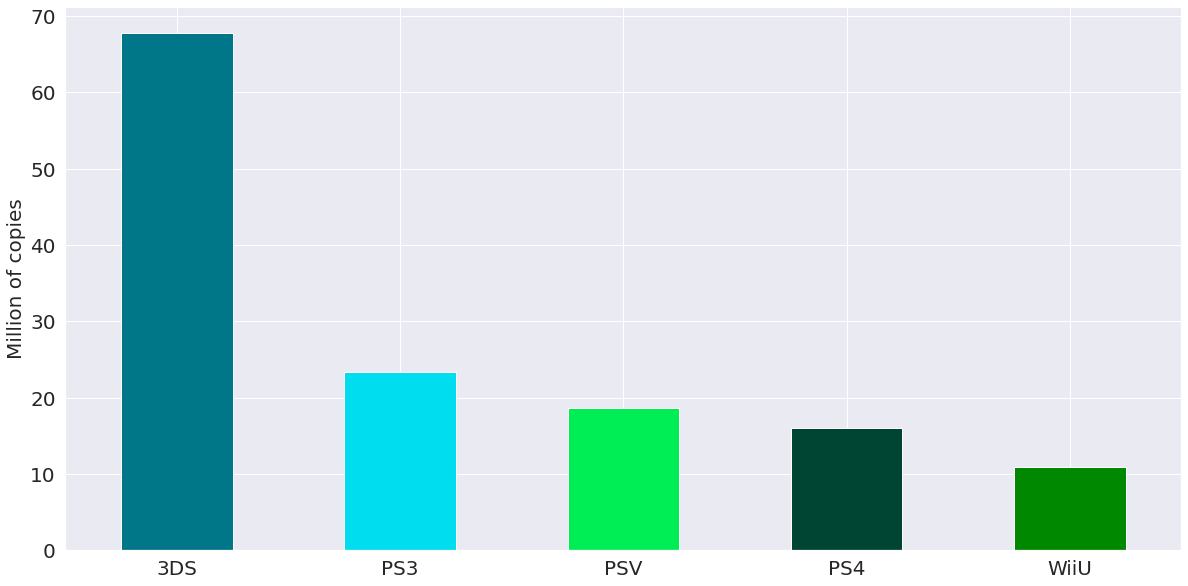

In [543]:
print_nlargest(top_5_platforms_jp)

In [403]:
#top 5 genre in JP
top_5_genre_jp = platforms_3.groupby(['genre'])['jp_sales'].sum().nlargest(5)

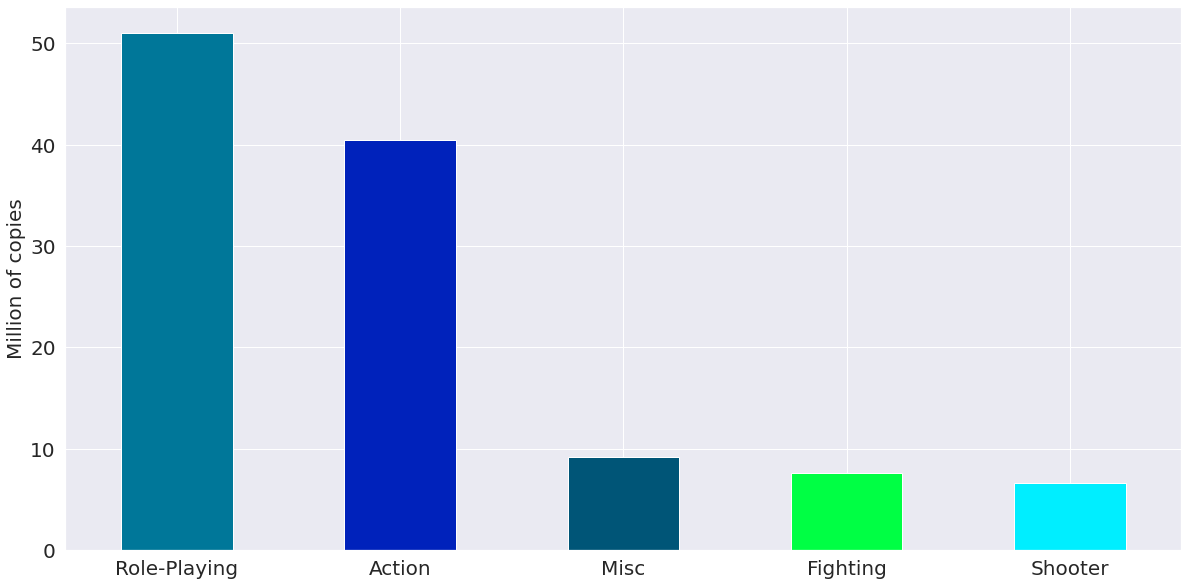

In [544]:
print_nlargest(top_5_genre_jp, "10")

In [405]:
# Rating Pending (RP)
# Everyone (E)
# Everyone 10+ (E10+)
# Teen (T)
# Mature 17+ (M)
# Adults Only 18+ (AO)
# Early Childhood (EC)

#raiting in JP
platforms_3.groupby(['rating'])['jp_sales'].sum().nlargest(10)

rating
RP      85.05
T       20.59
E       15.14
M       14.11
E10+     5.89
Name: jp_sales, dtype: float64

In [406]:
esrb_common = platforms_3.pivot_table(index = ['rating'], values = ['na_sales','jp_sales','eu_sales', 'total_sales'], aggfunc = np.sum).reset_index()
esrb_common['eu_pc'] = (esrb_common['eu_sales'] / esrb_common['total_sales']) * 100
esrb_common['na_pc'] = (esrb_common['na_sales'] / esrb_common['total_sales']) * 100
esrb_common['jp_pc'] = (esrb_common['jp_sales'] / esrb_common['total_sales']) * 100

print(esrb_common)

  rating  eu_sales  jp_sales  na_sales  total_sales      eu_pc      na_pc  \
0      E     83.36     15.14     79.05       200.16  41.646683  39.493405   
1   E10+     42.69      5.89     54.24       115.39  36.996274  47.005806   
2      M    145.32     14.11    165.21       371.68  39.098149  44.449526   
3     RP     78.91     85.05     89.42       276.84  28.503829  32.300246   
4      T     41.95     20.59     49.79       126.62  33.130627  39.322382   

       jp_pc  
0   7.563949  
1   5.104428  
2   3.796276  
3  30.721717  
4  16.261254  


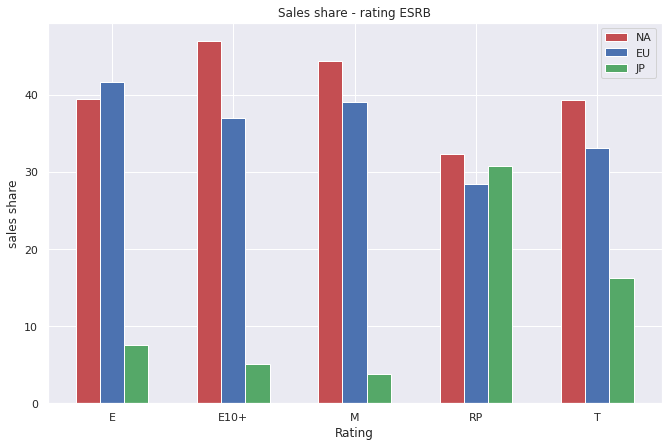

In [407]:
plt.figure(figsize = (11, 7))

rating_labels = esrb_common['rating']
rating_x = np.arange(len(rating_labels))  # the label locations
plt.bar(rating_x - 0.2, esrb_common['na_pc'], width = 0.2, alpha = 1, label = 'NA', color = 'r')
plt.bar(rating_x, esrb_common['eu_pc'], width = 0.2, alpha = 1, label = 'EU', color = 'b')
plt.bar(rating_x + 0.2, esrb_common['jp_pc'], width = 0.2, alpha = 1, label = 'JP', color = 'g')

plt.legend()
plt.title('Sales share - rating ESRB')
plt.xlabel('Rating')
plt.ylabel('sales share')
plt.xticks(rating_x, rating_labels)
plt.show()

In Europe, the most popular platform is PS4 (Sony Playstation), followed by PS3, XOne, X360, 3DS. In North America the most popular platform is PS4 (Sony Playstation), then XOne, X360, PS3, 3DS. 

Japan is clearly dominated by Japanese platforms, the most popular platform is 3DS, then PS3, PSV, PS4, WiiU. 
The most popular genres in Europe are Action, Shooter, Sports, Role-Playing, Racing.

The most popular genres in North America are Action, Shooter, Sports, Role-Playing, Music The most popular genres in Japan are Role-Playing, Action, Misc, Fighting, Shooter.

The ESRB rating does not have a significant impact on regional sales. It can be noted that for the JP region, the share of games with a Teen (T) rating is higher than for games with a different rating.

##  Checking the hypothesis


There are two population. We are going to check 2 hypotheses:

1.The average user ratings of the Xbox One and PC platforms are the same;

2.The average user ratings for the Action and Sports genres are different.

We are going to use method scipy.stats.ttest_ind() for checking the hypothesis of equality of two means.

We are going to prepare samples and to calculate variances:

In [189]:
data_XOne=platforms_3[(platforms_3['platform'] == 'XOne')]
data_pc=platforms_3[(platforms_3['platform'] == 'PC')]

data_action=platforms_3[(platforms_3['genre'] == 'Action')]
data_sports=platforms_3[(platforms_3['genre'] == 'Sports')]


In [190]:
to_variance(data_XOne, 'user_score')

Variance (дисперсия):  12.903232965628023
Standard deviation:  3.5921070370505417
Maximum value (limit outlier): 15.273891961354053


In [191]:
to_variance(data_pc, 'user_score')

Variance (дисперсия):  10.611706279219508
Standard deviation:  3.257561400682957
Maximum value (limit outlier): 14.708133937498607


In [192]:
variance_a = np.var(data_XOne['user_score'])
variance_b = np.var(data_pc['user_score'])

delta_variance = abs(variance_a - variance_b)
print(delta_variance)
print(delta_variance < variance_a * 0.05)


2.291526686408515
False


In [193]:
to_variance(data_action, 'user_score')

Variance (дисперсия):  16.74903135204412
Standard deviation:  4.092558045042749
Maximum value (limit outlier): 15.201695022856706


In [194]:
to_variance(data_sports, 'user_score')

Variance (дисперсия):  10.32854070224474
Standard deviation:  3.2138047081683014
Maximum value (limit outlier): 13.244685152542289


In [195]:
variance_c = np.var(data_action['user_score'])
variance_d = np.var(data_sports['user_score'])

delta_variance_2 = abs(variance_c - variance_d)
print(delta_variance_2)
print(delta_variance_2 < variance_c * 0.05)

6.42049064979938
False


The variances are not equal, so set equal_var=False

1. We form hypotheses:

H₀ - The average user ratings of the Xbox One and PC platforms are equal

H1 - The average user ratings of the Xbox One and PC platforms are not equal

Critical level of significance(p) was taken equal to 0.05. If the p-value turns out to be less than it, we will reject the hypothesis.

In [196]:
alpha=0.05

results = st.ttest_ind(data_XOne['user_score'], data_pc['user_score'],equal_var = False) 

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("null hypothesis is rejected")
else:
    print("Failed to reject null hypothesis") 

p-value:  0.18525294299367773
Failed to reject null hypothesis


There is not statistically significant difference between samples. It means that the average user ratings of the Xbox One and PC platforms are equal.

2. We form hypotheses:

H₀ - The average user ratings for the Action and Sports genres are equal.

H1 - The average user ratings for the Action and Sports genres are not equal.

Critical level of significance(p) was taken equal to 0.05. If the p-value turns out to be less than it, we will reject the hypothesis.


In [197]:
alpha=0.05

results = st.ttest_ind(data_action['user_score'], data_sports['user_score'],equal_var = False) 

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("null hypothesis is rejected")
else:
    print("Failed to reject null hypothesis") 

p-value:  0.010803347042065387
null hypothesis is rejected


We are rejecting H₀, so hypothesis H1 is correct and the average user ratings of Action and Sports genres are not equal and there are statistically significant changes in 2 samples. 

## Summary

The most profitable platforms are PS4, PS3, XOne, 3DS, X360.

In Europe, the most popular platform is PS4 (Sony Playstation), then PS3, XOne, X360, 3DS. In North America the most popular platform is PS4 (Sony Playstation), then XOne, X360, PS3, 3DS. 

Japan is clearly dominated by Japanese platforms, the most popular platform is 3DS, then PS3, PSV, PS4, WiiU. 
The most popular genres in Europe are Action, Shooter, Sports, Role-Playing, Racing.

The most popular genres in North America are Action, Shooter, Sports, Role-Playing, Music The most popular genres in Japan are Role-Playing, Action, Misc, Fighting, Shooter.

The highest sales can be identified in the Action, Role-Playing, Adventure genres. The Puzzle game has the smallest number of sales - 17 million copies. Less than 100 million copies of the genres - Racing, Fighting, Platform, Simulation, Strategy. However, a game can have multiple genres. For example GTA5 may have several genres of Shooter, Action, Racing.


Sales depend on the rating of critics. The ESRB rating does not have a significant impact on regional sales. It can be noted that for the JP region, the share of games with a Teen (T) rating is higher than for games with a different rating.

10 years - the average  platforms life cycle. 

The largest number of games were released in 2007-2010. A sharp increase of the amount of release gameshas been observed since 2002. 
Since 2012, the amount of release games has been decreased. Perhaps there has been a transition from the quantity to the quality of released games on these platforms. 

